<a href="https://colab.research.google.com/github/kashyapHebbar/CBCT_Reconstruction/blob/main/SSIM_SNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python


In [ ]:
from skimage import img_as_float
from skimage.metrics import structural_similarity as ssim
import numpy as np
import cv2

# Define the paths for your images
img1_path = "/content/Screenshot 2023-09-01 at 17.10.34.png"  # Original image
img2_path = "/content/CBCT.png"  # Corrected image

# Read the images from their paths
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Crop both images to match the dimensions of the smaller image
min_width = min(img1.shape[1], img2.shape[1])
min_height = min(img1.shape[0], img2.shape[0])
img1_cropped = img1[:min_height, :min_width]
img2_cropped = img2[:min_height, :min_width]

# Convert to float for better accuracy
img1_float = img_as_float(img1_cropped)
img2_float = img_as_float(img2_cropped)

# Compute SSIM
ssim_value = ssim(img1_float, img2_float, data_range=img2_float.max() - img2_float.min())
print(f"SSIM: {ssim_value}")

# Compute sSNR
signal = np.array(img1_float, dtype=np.float64)
noise = np.array(img2_float, dtype=np.float64) - signal
sSNR = 10 * np.log10(np.mean(signal ** 2) / np.mean(noise ** 2))
print(f"sSNR: {sSNR}")


SSIM: 0.3932281680294686
sSNR: 8.327417794276908


In [ ]:
import cv2

# Read the images
img1 = cv2.imread('/content/Real.27.34.png', cv2.IMREAD_GRAYSCALE)  # or cv2.IMREAD_COLOR for color
img2 = cv2.imread('/content/fake.27.24.png', cv2.IMREAD_GRAYSCALE)  # or cv2.IMREAD_COLOR for color

# Get dimensions
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]

print(f"Dimensions of img1: Width = {width1}, Height = {height1}")
print(f"Dimensions of img2: Width = {width2}, Height = {height2}")


Dimensions of img1: Width = 490, Height = 486
Dimensions of img2: Width = 486, Height = 482


In [ ]:
from skimage import img_as_float
from skimage.metrics import structural_similarity as ssim
import numpy as np
import cv2

# Define the paths for your images
real_CT_path = "/content/RealCT-exp1.png"
real_CBCT_path = "/content/RealCBCTexp1.png"
generated_CBCT_path = "/content/Re-CBCTexp11.png"

# Read the images from their paths
real_CT = cv2.imread(real_CT_path, cv2.IMREAD_GRAYSCALE)
real_CBCT = cv2.imread(real_CBCT_path, cv2.IMREAD_GRAYSCALE)
generated_CBCT = cv2.imread(generated_CBCT_path, cv2.IMREAD_GRAYSCALE)

# Crop images to match the dimensions of the smallest image
min_width = min(real_CT.shape[1], real_CBCT.shape[1], generated_CBCT.shape[1])
min_height = min(real_CT.shape[0], real_CBCT.shape[0], generated_CBCT.shape[0])

real_CT_cropped = real_CT[:min_height, :min_width]
real_CBCT_cropped = real_CBCT[:min_height, :min_width]
generated_CBCT_cropped = generated_CBCT[:min_height, :min_width]

# Convert to float for better accuracy
real_CT_float = img_as_float(real_CT_cropped)
real_CBCT_float = img_as_float(real_CBCT_cropped)
generated_CBCT_float = img_as_float(generated_CBCT_cropped)

# Compute SSIM between real CT and real CBCT
ssim_value1 = ssim(real_CT_float, real_CBCT_float, data_range=real_CBCT_float.max() - real_CBCT_float.min())
print(f"SSIM between real CT and real CBCT: {ssim_value1}")

# Compute sSNR between real CT and real CBCT
signal1 = np.array(real_CT_float, dtype=np.float64)
noise1 = np.array(real_CBCT_float, dtype=np.float64) - signal1
sSNR1 = 10 * np.log10(np.mean(signal1 ** 2) / np.mean(noise1 ** 2))
print(f"sSNR between real CT and real CBCT: {sSNR1}")

# Compute SSIM between generated CT and real CBCT
ssim_value2 = ssim(generated_CBCT_float, real_CBCT_float, data_range=real_CBCT_float.max() - real_CBCT_float.min())
print(f"SSIM between generated CT and real CBCT: {ssim_value2}")

# Compute sSNR between generated CT and real CBCT
signal2 = np.array(generated_CBCT_float, dtype=np.float64)
noise2 = np.array(real_CBCT_float, dtype=np.float64) - signal2
sSNR2 = 10 * np.log10(np.mean(signal2 ** 2) / np.mean(noise2 ** 2))
print(f"sSNR between generated CT and real CBCT: {sSNR2}")


SSIM between real CT and real CBCT: 0.5485164492640331
sSNR between real CT and real CBCT: 7.3527142863085535
SSIM between generated CT and real CBCT: 0.5679149030756305
sSNR between generated CT and real CBCT: 7.434344272959004


In [ ]:
from skimage import img_as_float
from skimage.metrics import structural_similarity as ssim
import numpy as np
import cv2

# Define the paths for your images
real_CT_path = "/content/RealCT-exp1.png"
FDK_CBCT_path = "/content/RealCBCTexp1.png"
generated_CBCT_path = "/content/Re-CBCTexp11.png"

# Read the images from their paths
real_CT = cv2.imread(real_CT_path, cv2.IMREAD_GRAYSCALE)
FDK_CBCT = cv2.imread(FDK_CBCT_path, cv2.IMREAD_GRAYSCALE)
generated_CBCT = cv2.imread(generated_CBCT_path, cv2.IMREAD_GRAYSCALE)

# Crop images to match the dimensions of the smallest image
min_width = min(real_CT.shape[1], FDK_CBCT.shape[1], generated_CBCT.shape[1])
min_height = min(real_CT.shape[0], FDK_CBCT.shape[0], generated_CBCT.shape[0])

real_CT_cropped = real_CT[:min_height, :min_width]
FDK_CBCT_cropped = FDK_CBCT[:min_height, :min_width]
generated_CBCT_cropped = generated_CBCT[:min_height, :min_width]

# Convert to float for better accuracy
real_CT_float = img_as_float(real_CT_cropped)
FDK_CBCT_float = img_as_float(FDK_CBCT_cropped)
generated_CBCT_float = img_as_float(generated_CBCT_cropped)

# Compute SSIM between real CT and FDK-generated CBCT
ssim_value1 = ssim(real_CT_float, FDK_CBCT_float, data_range=FDK_CBCT_float.max() - FDK_CBCT_float.min())
print(f"SSIM between real CT and FDK-generated CBCT: {ssim_value1}")

# Compute sSNR between real CT and FDK-generated CBCT
signal1 = np.array(real_CT_float, dtype=np.float64)
noise1 = np.array(FDK_CBCT_float, dtype=np.float64) - signal1
sSNR1 = 10 * np.log10(np.mean(signal1 ** 2) / np.mean(noise1 ** 2))
print(f"sSNR between real CT and FDK-generated CBCT: {sSNR1}")

# Compute SSIM between real CT and deep learning-generated CBCT
ssim_value2 = ssim(real_CT_float, generated_CBCT_float, data_range=generated_CBCT_float.max() - generated_CBCT_float.min())
print(f"SSIM between real CT and deep learning-generated CBCT: {ssim_value2}")

# Compute sSNR between real CT and deep learning-generated CBCT
signal2 = np.array(real_CT_float, dtype=np.float64)
noise2 = np.array(generated_CBCT_float, dtype=np.float64) - signal2
sSNR2 = 10 * np.log10(np.mean(signal2 ** 2) / np.mean(noise2 ** 2))
print(f"sSNR between real CT and deep learning-generated CBCT: {sSNR2}")


SSIM between real CT and FDK-generated CBCT: 0.5485164492640331
sSNR between real CT and FDK-generated CBCT: 7.3527142863085535
SSIM between real CT and deep learning-generated CBCT: 0.44793603768863577
sSNR between real CT and deep learning-generated CBCT: 2.5964658227304858


In [ ]:
from skimage import img_as_float
from skimage.metrics import structural_similarity as ssim
import numpy as np
import cv2

# Define the paths for your images
real_CT_path = "/content/RealCTex1.png"
FDK_CBCT_path = "/content/FDCBCT.png"
generated_CBCT_path = "/content/DCBCT.png"

# Read the images from their paths
real_CT = cv2.imread(real_CT_path, cv2.IMREAD_GRAYSCALE)
FDK_CBCT = cv2.imread(FDK_CBCT_path, cv2.IMREAD_GRAYSCALE)
generated_CBCT = cv2.imread(generated_CBCT_path, cv2.IMREAD_GRAYSCALE)

# Crop images to match the dimensions of the smallest image
min_width = min(real_CT.shape[1], FDK_CBCT.shape[1], generated_CBCT.shape[1])
min_height = min(real_CT.shape[0], FDK_CBCT.shape[0], generated_CBCT.shape[0])

real_CT_cropped = real_CT[:min_height, :min_width]
FDK_CBCT_cropped = FDK_CBCT[:min_height, :min_width]
generated_CBCT_cropped = generated_CBCT[:min_height, :min_width]

# Convert to float for better accuracy
real_CT_float = img_as_float(real_CT_cropped)
FDK_CBCT_float = img_as_float(FDK_CBCT_cropped)
generated_CBCT_float = img_as_float(generated_CBCT_cropped)

# Compute SSIM between real CT and FDK-generated CBCT
ssim_value1 = ssim(real_CT_float, FDK_CBCT_float, data_range=FDK_CBCT_float.max() - FDK_CBCT_float.min())
print(f"SSIM between real CT and FDK-generated CBCT: {ssim_value1}")

# Compute sSNR between real CT and FDK-generated CBCT
signal1 = np.array(real_CT_float, dtype=np.float64)
noise1 = np.array(FDK_CBCT_float, dtype=np.float64) - signal1
sSNR1 = 10 * np.log10(np.mean(signal1 ** 2) / np.mean(noise1 ** 2))
print(f"sSNR between real CT and FDK-generated CBCT: {sSNR1}")

# Compute SSIM between real CT and deep learning-generated CBCT
ssim_value2 = ssim(real_CT_float, generated_CBCT_float, data_range=generated_CBCT_float.max() - generated_CBCT_float.min())
print(f"SSIM between real CT and deep learning-generated CBCT: {ssim_value2}")

# Compute sSNR between real CT and deep learning-generated CBCT
signal2 = np.array(real_CT_float, dtype=np.float64)
noise2 = np.array(generated_CBCT_float, dtype=np.float64) - signal2
sSNR2 = 10 * np.log10(np.mean(signal2 ** 2) / np.mean(noise2 ** 2))
print(f"sSNR between real CT and deep learning-generated CBCT: {sSNR2}")


SSIM between real CT and FDK-generated CBCT: 0.5088899645673449
sSNR between real CT and FDK-generated CBCT: 6.977738108626598
SSIM between real CT and deep learning-generated CBCT: 0.32415023657397296
sSNR between real CT and deep learning-generated CBCT: 1.882781578931863


In [ ]:
pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.5 MB/s eta 0:00:00


In [ ]:
import PyPDF2

with open('/content/Dissertation_Template2023.pdf', 'rb') as f:
    pdf_reader = PyPDF2.PdfFileReader(f)
    num_pages = pdf_reader.numPages
    text = ""
    for page_num in range(num_pages):
        page = pdf_reader.getPage(page_num)
        text += page.extract_text()
    words = text.split()
    num_words = len(words)

print(f'Number of pages: {num_pages}')
print(f'Number of words: {num_words}')


DeprecationError: ignored

In [ ]:
pip install pyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.2 MB/s eta 0:00:00


In [ ]:
from PyPDF2 import PdfReader

# Initialize PdfReader object and count pages
pdf = PdfReader("/content/Dissertation_Template2023.pdf")
num_pages = len(pdf.pages)

# Initialize text variable and read each page's text into it
text = ""
for i in range(num_pages):
    text += pdf.pages[i].extract_text()

# Count words in the extracted text
words = text.split()
num_words = len(words)

print(f'Number of pages: {num_pages}')
print(f'Number of words: {num_words}')


Number of pages: 46
Number of words: 11565


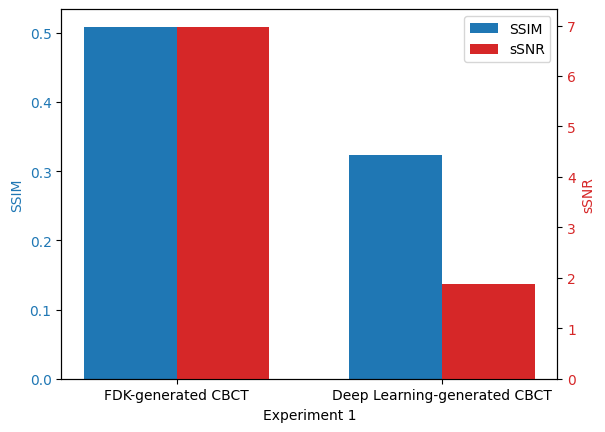

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Labels for the bars
labels = ['FDK-generated CBCT', 'Deep Learning-generated CBCT']

# SSIM values for each experiment
ssim_values = [0.5088899645673449, 0.32415023657397296]

# sSNR values for each experiment
ssnr_values = [6.977738108626598, 1.882781578931863]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()

# Make some plots
color = 'tab:blue'
ax1.set_xlabel('Experiment 1')
ax1.set_ylabel('SSIM', color=color)
ax1.bar(x - width/2, ssim_values, width, color=color, label='SSIM')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('sSNR', color=color)
ax2.bar(x + width/2, ssnr_values, width, color=color, label='sSNR')
ax2.tick_params(axis='y', labelcolor=color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# Added these two lines to make the legend work
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.show()
